In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import QTable, Table, Column
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tsa.ar_model import AutoReg

In [3]:
# Load the data
GSK = pd.read_csv('data/GSK.csv',index_col=0, parse_dates=True)
JNJ = pd.read_csv('data/JNJ.csv',index_col=0, parse_dates=True)
MRK = pd.read_csv('data/MRK.csv',index_col=0, parse_dates=True)
PFE = pd.read_csv('data/PFE.csv',index_col=0, parse_dates=True)
SNY = pd.read_csv('data/SNY.csv',index_col=0, parse_dates=True)

In [4]:
# Get the trends data
trends = GSK[['Virus', 'Flu', 'Vaccine', 'Policy']]
trends.head()

,Virus,Flu,Vaccine,Policy
Date,,,,
2010-11-01,5,12,13,0
2010-12-01,5,16,9,0
2011-01-01,5,18,12,0
2011-02-01,5,13,12,0
2011-03-01,5,9,13,0


Text(0, 0.5, 'Score')

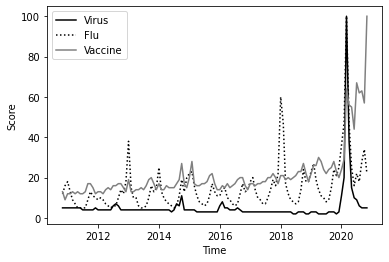

In [5]:
# Visualize the trends data
plt.plot(trends.index, trends['Virus'], color = 'black', label = 'Virus')
plt.plot(trends.index, trends['Flu'], color = 'black', label = 'Flu', linestyle=":")
plt.plot(trends.index, trends['Vaccine'], color = 'gray', label = 'Vaccine')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Score')

In [6]:
GSK['log_Adj_Close'] = np.log(GSK['Adj Close'])
JNJ['log_Adj_Close'] = np.log(JNJ['Adj Close'])
MRK['log_Adj_Close'] = np.log(MRK['Adj Close'])
PFE['log_Adj_Close'] = np.log(PFE['Adj Close'])
SNY['log_Adj_Close'] = np.log(SNY['Adj Close'])

In [83]:
GSK_2020 = pd.read_csv('data/GSK_2020.csv',index_col=0, parse_dates=True)

In [84]:
GSK_2020.iloc[0]

Adj Close    43.315044
Vaccine      15.000000
Covid         0.000000
Virus         2.000000
Name: 2019-12-02 00:00:00, dtype: float64

In [85]:
GSK_2020['log_Adj_Close'] = np.log(GSK_2020['Adj Close'])

In [86]:
GSK_2020

,Adj Close,Vaccine,Covid,Virus,log_Adj_Close
Date,,,,,
2019-12-02,43.315044,15,0,2,3.768500
2019-12-09,43.762375,14,0,2,3.778774
2019-12-16,45.037754,13,0,2,3.807501
2019-12-23,45.009193,11,0,2,3.806867
2019-12-30,44.238262,12,0,2,3.789590
2020-01-06,44.533310,15,0,2,3.796237
2020-01-13,45.580257,15,0,2,3.819475
2020-01-20,44.952087,16,0,14,3.805597
2020-01-27,44.542831,20,0,32,3.796451


In [350]:
model = AutoReg(GSK.iloc[1:]['log_Adj_Close'], exog = GSK.iloc[1:][['Virus','Flu','Vaccine','Policy']], lags=1)
model_fit = model.fit()
model_fit.summary()

C:\Users\symay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:          log_Adj_Close   No. Observations:                  120
Model:                   AutoReg-X(1)   Log Likelihood                 194.576
Method:               Conditional MLE   S.D. of innovations              0.047
Date:                Mon, 14 Dec 2020   AIC                             -5.990
Time:                        01:56:01   BIC                             -5.827
Sample:                    01-01-2011   HQIC                            -5.924
                         - 11-01-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.3678      0.120      3.057      0.002       0.132       0.604
log_Adj_Close.L1     0.8935      0.035     25.298      0.000       0.824       0.963
Virus               -0.0006      0.001     -0.904      0.366      -0.002       0.001
Flu               6.841e-05      0.001      0.129      0.897      -0.001       0.001
Vaccine              0.0005      0.000      1.261      0.207      -0.000       0.001
Policy             1.43e-05      0.000      0.076      0.939      -0.000       0.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1192           +0.0000j            1.1192            0.0000
-----------------------------------------------------------------------------
"""

In [347]:
model = AutoReg(JNJ.iloc[1:]['log_Adj_Close'], exog = JNJ.iloc[1:][['Virus','Flu','Vaccine','Policy']], lags=1)
model_fit = model.fit()
model_fit.summary()

Coefficients: intercept           0.095398
log_Adj_Close.L1    0.979541
Virus               0.000238
Flu                -0.000467
Vaccine             0.000491
Policy              0.000161
dtype: float64


C:\Users\symay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:          log_Adj_Close   No. Observations:                  120
Model:                   AutoReg-X(1)   Log Likelihood                 208.831
Method:               Conditional MLE   S.D. of innovations              0.042
Date:                Mon, 14 Dec 2020   AIC                             -6.230
Time:                        01:54:21   BIC                             -6.067
Sample:                    01-01-2011   HQIC                            -6.164
                         - 11-01-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.0954      0.057      1.660      0.097      -0.017       0.208
log_Adj_Close.L1     0.9795      0.014     70.202      0.000       0.952       1.007
Virus                0.0002      0.001      0.395      0.693      -0.001       0.001
Flu                 -0.0005      0.000     -0.944      0.345      -0.001       0.001
Vaccine              0.0005      0.000      1.291      0.197      -0.000       0.001
Policy               0.0002      0.000      0.944      0.345      -0.000       0.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0209           +0.0000j            1.0209            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
def base_prediction(stock):
    pred_base = []
    base_xtrain = []
    base_ytrain = []
    for i in range(len(stock)-2):
        base_xtrain.append(stock.iloc[i]['log_Adj_Close'])
        base_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(base_xtrain).reshape(-1,1)
        temp_y = np.array(base_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close']]) + model.intercept_
        # Store the prediction 
        #print(yhat[0])
        pred_base.append(yhat[0])
        
    return model, pred_base

In [52]:
GSK_base_2020 = base_prediction(GSK_2020)

In [60]:
len(GSK_2020)

53

In [54]:
len(GSK_base_2020[1])

51

In [342]:
# Make the base prediction for five stocks
GSK_base = base_prediction(GSK)
JNJ_base = base_prediction(JNJ)
MRK_base = base_prediction(MRK)
PFE_base = base_prediction(PFE)
SNY_base = base_prediction(SNY)

In [10]:
# Get the actual stock price
GSK_actual = GSK['log_Adj_Close'][2:]
JNJ_actual = JNJ['log_Adj_Close'][2:]
MRK_actual = MRK['log_Adj_Close'][2:]
PFE_actual = PFE['log_Adj_Close'][2:]
SNY_actual = SNY['log_Adj_Close'][2:]

In [69]:
GSK_actual_2020 = GSK_2020['log_Adj_Close'][2:]

In [70]:
len(GSK_actual_2020)

51

In [71]:
MAE_GSK_base_2020 = MAE_GSK_b = MAE(GSK_base_2020[1],GSK_actual_2020)

In [72]:
MAE_GSK_base_2020

0.03422761189533564

In [261]:
MAE_GSK_b = MAE(GSK_base,GSK_actual)
MAE_JNJ_b = MAE(JNJ_base,JNJ_actual)
MAE_MRK_b = MAE(MRK_base,MRK_actual)
MAE_PFE_b = MAE(PFE_base,PFE_actual)
MAE_SNY_b = MAE(SNY_base,SNY_actual)

In [65]:
def gt_prediction(stock, var):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-2):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+1][var]])
        trends_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,len(var)+1)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+2][var]]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [344]:
# Policy prediction
var = ['Policy']
GSK_policy = gt_prediction(GSK, var)
JNJ_policy = gt_prediction(JNJ, var)
MRK_policy = gt_prediction(MRK, var)
PFE_policy = gt_prediction(PFE, var)
SNY_policy = gt_prediction(SNY, var)

[[9.10639242e-01 3.88948891e-05]]
[[9.82383755e-01 1.61934170e-04]]
[[9.83255059e-01 3.02432631e-05]]
[[9.60704967e-01 3.10927880e-04]]
[[9.26345320e-01 2.72845784e-04]]


In [80]:
MAE_GSK_policy_2020 = MAE(GSK_policy_2020,GSK_actual_2020)

In [32]:
MAE_GSK_policy_2020

0.5664273515894744

In [87]:
var = ['Virus']
GSK_virus_2020 = gt_prediction(GSK_2020, var)

[[ 8.08297079e-01 -6.08942403e-04]]


In [66]:
var = ['Vaccine']
GSK_vaccine_2020 = gt_prediction(GSK_2020, var)

[[ 7.69285279e-01 -5.23359483e-04]]


In [88]:
MAE_GSK_virus_2020 = MAE(GSK_virus_2020,GSK_actual_2020)
MAE_GSK_virus_2020

0.037660772771828464

Text(0, 0.5, 'Stock Price')

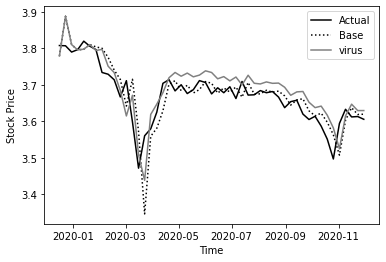

In [89]:
plt.plot(GSK_2020.index[2:],GSK_actual_2020, color='black', label='Actual')
plt.plot(GSK_2020.index[2:],GSK_base_2020[1], color='black', label='Base', linestyle=":")
plt.plot(GSK_2020.index[2:],GSK_virus_2020, color='gray', label='virus')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

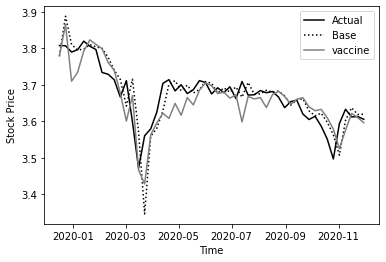

In [92]:
plt.plot(GSK_2020.index[2:],GSK_actual_2020, color='black', label='Actual')
plt.plot(GSK_2020.index[2:],GSK_base_2020[1], color='black', label='Base', linestyle=":")
plt.plot(GSK_2020.index[2:],GSK_vaccine_2020, color='gray', label='vaccine')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [90]:
[MAE(GSK_base_2020[1][12:20],GSK_actual_2020[12:20]),MAE(GSK_virus_2020[12:20],GSK_actual_2020[12:20])]

[0.07646621463726055, 0.04680429690089938]

In [109]:
[MAE(GSK_base_2020[1][-5:],GSK_actual_2020[-5:]),MAE(GSK_virus_2020[-5:],GSK_actual_2020[-5:])]

[0.032358645974960874, 0.03255476616878043]

In [108]:
[MAE(GSK_base_2020[1][-5:],GSK_actual_2020[-5:]),MAE(GSK_vaccine_2020[-5:],GSK_actual_2020[-5:])]

[0.032358645974960874, 0.029672329768786643]

In [93]:
[MAE(GSK_base_2020[1][12:20],GSK_actual_2020[12:20]),MAE(GSK_vaccine_2020[12:20],GSK_actual_2020[12:20])]

[0.07646621463726055, 0.059756648186037375]

In [284]:
MAE_GSK_p = MAE(GSK_policy,GSK_actual)
MAE_JNJ_p = MAE(JNJ_policy,JNJ_actual)
MAE_MRK_p = MAE(MRK_policy,MRK_actual)
MAE_PFE_p = MAE(PFE_policy,PFE_actual)
MAE_SNY_p = MAE(SNY_policy,SNY_actual)

Text(0, 0.5, 'Stock Price')

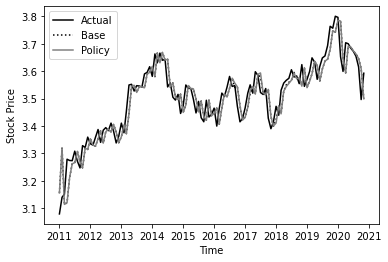

In [286]:
plt.plot(GSK.index[2:],GSK_actual, color='black', label='Actual')
plt.plot(GSK.index[2:],GSK_base, color='black', label='Base', linestyle=":")
plt.plot(GSK.index[2:],GSK_policy, color='gray', label='Policy')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [287]:
# Virus prediction
var = ['Virus']
GSK_virus = gt_prediction(GSK, var)
JNJ_virus = gt_prediction(JNJ, var)
MRK_virus = gt_prediction(MRK, var)
PFE_virus = gt_prediction(PFE, var)
SNY_virus = gt_prediction(SNY, var)

In [288]:
MAE_GSK_vi = MAE(GSK_virus,GSK_actual)
MAE_JNJ_vi = MAE(JNJ_virus,JNJ_actual)
MAE_MRK_vi = MAE(MRK_virus,MRK_actual)
MAE_PFE_vi = MAE(PFE_virus,PFE_actual)
MAE_SNY_vi = MAE(SNY_virus,SNY_actual)

In [289]:
# Flu prediction
var = ['Flu']
GSK_flu = gt_prediction(GSK, var)
JNJ_flu = gt_prediction(JNJ, var)
MRK_flu = gt_prediction(MRK, var)
PFE_flu = gt_prediction(PFE, var)
SNY_flu = gt_prediction(SNY, var)

In [290]:
MAE_GSK_f = MAE(GSK_flu,GSK_actual)
MAE_JNJ_f = MAE(JNJ_flu,JNJ_actual)
MAE_MRK_f = MAE(MRK_flu,MRK_actual)
MAE_PFE_f = MAE(PFE_flu,PFE_actual)
MAE_SNY_f = MAE(SNY_flu,SNY_actual)

In [291]:
# Vaccine prediction
var = ['Vaccine']
GSK_vaccine = gt_prediction(GSK, var)
JNJ_vaccine = gt_prediction(JNJ, var)
MRK_vaccine = gt_prediction(MRK, var)
PFE_vaccine = gt_prediction(PFE, var)
SNY_vaccine = gt_prediction(SNY, var)

In [292]:
MAE_GSK_va = MAE(GSK_vaccine,GSK_actual)
MAE_JNJ_va = MAE(JNJ_vaccine,JNJ_actual)
MAE_MRK_va = MAE(MRK_vaccine,MRK_actual)
MAE_PFE_va = MAE(PFE_vaccine,PFE_actual)
MAE_SNY_va = MAE(SNY_vaccine,SNY_actual)

Text(0, 0.5, 'Stock Price')

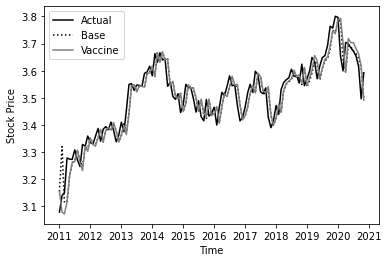

In [293]:
plt.plot(GSK.index[2:],GSK_actual, color='black', label='Actual')
plt.plot(GSK.index[2:],GSK_base, color='black', label='Base', linestyle=":")
plt.plot(GSK.index[2:],GSK_vaccine, color='gray', label='Vaccine')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [345]:
def trends_prediction(stock):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-2):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+1]['Virus'],stock.iloc[i+1]['Flu'],stock.iloc[i+1]['Vaccine'],stock.iloc[i+1]['Policy']])
        trends_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,5)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+1]['Virus'],stock.iloc[i+1]['Flu'],stock.iloc[i+1]['Vaccine'],stock.iloc[i+1]['Policy']]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [99]:
def trends_prediction_1(stock):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-2):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+1]['Virus'],stock.iloc[i+1]['Vaccine']])
        trends_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,3)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+1]['Virus'],stock.iloc[i+1]['Vaccine']]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [346]:
# Trends Prediction
GSK_trends = trends_prediction(GSK)
JNJ_trends = trends_prediction(JNJ)
MRK_trends = trends_prediction(MRK)
PFE_trends = trends_prediction(PFE)
SNY_trends = trends_prediction(SNY)

[[ 9.11855525e-01 -4.08127095e-04  1.62310833e-04 -9.30238308e-06
   2.78446582e-05]]
[[ 9.81973991e-01  3.25812103e-04 -4.52102997e-04  2.98172233e-04
   1.62644662e-04]]
[[ 9.81652235e-01  1.24624942e-04 -4.34777311e-04  3.62613352e-04
   2.74644657e-05]]
[[ 9.39895486e-01 -8.86843795e-04  5.82094725e-04  8.96153246e-04
   3.18167015e-04]]
[[ 9.16047224e-01 -3.06375710e-05 -6.97160314e-04  7.80508384e-04
   2.60697095e-04]]


In [100]:
GSK_2020_t = trends_prediction_1(GSK_2020)

[[ 7.23920319e-01 -6.06092948e-04 -5.18031291e-04]]


In [101]:
[MAE(GSK_base_2020[1],GSK_actual_2020),MAE(GSK_2020_t,GSK_actual_2020)]

[0.03422761189533564, 0.036164138761208976]

Text(0, 0.5, 'Stock Price')

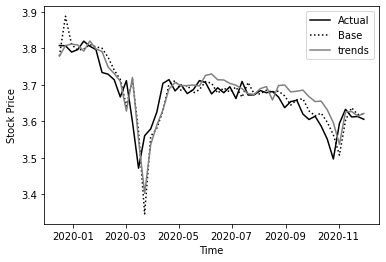

In [102]:
plt.plot(GSK_2020.index[2:],GSK_actual_2020, color='black', label='Actual')
plt.plot(GSK_2020.index[2:],GSK_base_2020[1], color='black', label='Base', linestyle=":")
plt.plot(GSK_2020.index[2:],GSK_2020_t, color='gray', label='trends')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [103]:
[MAE(GSK_base_2020[1][:20],GSK_actual_2020[:20]),MAE(GSK_2020_t[:20],GSK_actual_2020[:20])]

[0.0516667275073319, 0.04431221910161689]

In [107]:
[MAE(GSK_base_2020[1][-5:],GSK_actual_2020[-5:]),MAE(GSK_2020_t[-5:],GSK_actual_2020[-5:])]

[0.032358645974960874, 0.019345527464010193]

In [304]:
MAE_GSK_t = MAE(GSK_trends,GSK_actual)
MAE_JNJ_t = MAE(JNJ_trends,JNJ_actual)
MAE_MRK_t = MAE(MRK_trends,MRK_actual)
MAE_PFE_t = MAE(PFE_trends,PFE_actual)
MAE_SNY_t = MAE(SNY_trends,SNY_actual)

In [135]:
# Compute 1-ratio
# virus
ratio_GSK_vi = (MAE_GSK_vi-MAE_GSK_b)/MAE_GSK_b *100
ratio_JNJ_vi = (MAE_JNJ_vi-MAE_JNJ_b)/MAE_GSK_b *100
ratio_MRK_vi = (MAE_MRK_vi-MAE_MRK_b)/MAE_MRK_b *100
ratio_PFE_vi = (MAE_PFE_vi-MAE_PFE_b)/MAE_PFE_b *100
ratio_SNY_vi = (MAE_SNY_vi-MAE_SNY_b)/MAE_SNY_b *100
# flu
ratio_GSK_f = (MAE_GSK_f-MAE_GSK_b)/MAE_GSK_b *100
ratio_JNJ_f = (MAE_JNJ_f-MAE_JNJ_b)/MAE_GSK_b *100
ratio_MRK_f = (MAE_MRK_f-MAE_MRK_b)/MAE_MRK_b *100
ratio_PFE_f = (MAE_PFE_f-MAE_PFE_b)/MAE_PFE_b *100
ratio_SNY_f = (MAE_SNY_f-MAE_SNY_b)/MAE_SNY_b *100
# vaccine
ratio_GSK_va = (MAE_GSK_va-MAE_GSK_b)/MAE_GSK_b *100
ratio_JNJ_va = (MAE_JNJ_va-MAE_JNJ_b)/MAE_GSK_b *100
ratio_MRK_va = (MAE_MRK_va-MAE_MRK_b)/MAE_MRK_b *100
ratio_PFE_va = (MAE_PFE_va-MAE_PFE_b)/MAE_PFE_b *100
ratio_SNY_va = (MAE_SNY_va-MAE_SNY_b)/MAE_SNY_b *100
# policy
ratio_GSK_p = (MAE_GSK_p-MAE_GSK_b)/MAE_GSK_b *100
ratio_JNJ_p = (MAE_JNJ_p-MAE_JNJ_b)/MAE_GSK_b *100
ratio_MRK_p = (MAE_MRK_p-MAE_MRK_b)/MAE_MRK_b *100
ratio_PFE_p = (MAE_PFE_p-MAE_PFE_b)/MAE_PFE_b *100
ratio_SNY_p = (MAE_SNY_p-MAE_SNY_b)/MAE_SNY_b *100
# Trends
ratio_GSK_t = (MAE_GSK_t-MAE_GSK_b)/MAE_GSK_b *100
ratio_JNJ_t = (MAE_JNJ_t-MAE_JNJ_b)/MAE_GSK_b *100
ratio_MRK_t = (MAE_MRK_t-MAE_MRK_b)/MAE_MRK_b *100
ratio_PFE_t = (MAE_PFE_t-MAE_PFE_b)/MAE_PFE_b *100
ratio_SNY_t = (MAE_SNY_t-MAE_SNY_b)/MAE_SNY_b *100

In [306]:
# Compare the MAE value
data_rows = (['GSK', round(MAE_GSK_b,5), round(MAE_GSK_vi,5), round(MAE_GSK_f,5), round(MAE_GSK_va,5), round(MAE_GSK_p,5), round(MAE_GSK_t,5)],
             ['JNJ', round(MAE_JNJ_b,5), round(MAE_JNJ_vi,5), round(MAE_JNJ_f,5), round(MAE_JNJ_va,5), round(MAE_JNJ_p,5), round(MAE_JNJ_t,5)],
             ['MRK', round(MAE_MRK_b,5), round(MAE_MRK_vi,5), round(MAE_MRK_f,5), round(MAE_MRK_va,5), round(MAE_MRK_p,5), round(MAE_MRK_t,5)],
             ['PFE', round(MAE_PFE_b,5), round(MAE_PFE_vi,5), round(MAE_PFE_f,5), round(MAE_PFE_va,5), round(MAE_PFE_p,5), round(MAE_PFE_t,5)],
             ['SNY', round(MAE_SNY_b,5), round(MAE_SNY_vi,5), round(MAE_SNY_f,5), round(MAE_SNY_va,5), round(MAE_SNY_p,5), round(MAE_SNY_t,5)])
t1 = Table(rows=data_rows, names=('Stock', 'MAE_base', 'MAE_virus', 'MAE_flu', 'MAE_vaccine', 'MAE_policy', 'MAE_trends'))
#print('       Behavio of MAE around Turning Points')
print(t1)

Stock MAE_base MAE_virus MAE_flu MAE_vaccine MAE_policy MAE_trends
----- -------- --------- ------- ----------- ---------- ----------
  GSK  0.04086   0.04516  0.0498     0.04197    0.04114    0.04309
  JNJ  0.03606   0.03926 0.08015     0.03653    0.03624    0.03727
  MRK  0.04286    0.0474 0.04785     0.04313    0.04363    0.04682
  PFE  0.04148   0.04605 0.04422     0.04486    0.04146    0.04593
  SNY  0.04585   0.05013 0.04827     0.04833     0.0463    0.04816


In [114]:
# Compare the 1-ratio
data_rows = (['GSK', round(ratio_GSK_vi,2), round(ratio_GSK_f,2), round(ratio_GSK_va,2), round(ratio_GSK_t,2)],
             ['JNJ', round(ratio_JNJ_vi,2), round(ratio_JNJ_f,2), round(ratio_JNJ_va,2), round(ratio_JNJ_t,2)],
             ['MRK', round(ratio_MRK_vi,2), round(ratio_MRK_f,2), round(ratio_MRK_va,2), round(ratio_MRK_t,2)],
             ['PFE', round(ratio_PFE_vi,2), round(ratio_PFE_f,2), round(ratio_PFE_va,2), round(ratio_PFE_t,2)],
             ['SNY', round(ratio_SNY_vi,2), round(ratio_SNY_f,2), round(ratio_SNY_va,2), round(ratio_SNY_t,2)])
t2 = Table(rows=data_rows, names=('Stock', '1-ratio_virus', '1-ratio_flu', '1-ratio_vaccine','1-ratio_trends'))
#print('       Behavio of MAE around Turning Points')
print(t2)

Stock 1-ratio_virus 1-ratio_flu 1-ratio_vaccine 1-ratio_trends
----- ------------- ----------- --------------- --------------
  GSK         24.09        7.18           11.93          29.36
  JNJ         28.06        5.84           15.48          72.04
  MRK         23.25       14.42            9.89          27.17
  PFE         14.32        4.33            10.0          23.96
  SNY         40.32       26.88           25.14          38.79


Text(0, 0.5, 'Stock Price')

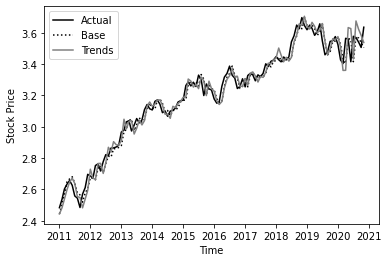

In [307]:
plt.plot(PFE.index[2:],PFE_actual, color='black', label='Actual')
plt.plot(PFE.index[2:],PFE_base, color='black', label='Base', linestyle=":")
plt.plot(PFE.index[2:],PFE_trends, color='gray', label='Trends')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

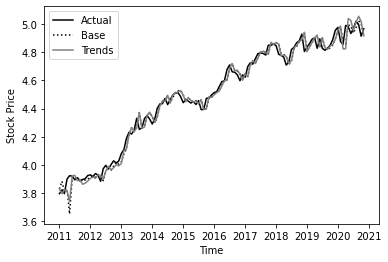

In [308]:
plt.plot(JNJ.index[2:],JNJ_actual, color='black', label='Actual')
plt.plot(JNJ.index[2:],JNJ_base, color='black', label='Base', linestyle=":")
plt.plot(JNJ.index[2:],JNJ_trends, color='gray', label='Trends')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

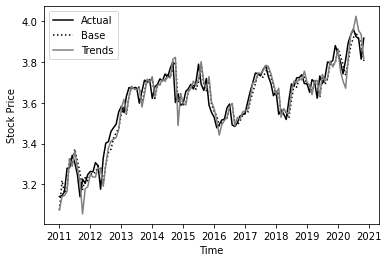

In [309]:
plt.plot(SNY.index[2:],SNY_actual, color='black', label='Actual')
plt.plot(SNY.index[2:],SNY_base, color='black', label='Base', linestyle=":")
plt.plot(SNY.index[2:],SNY_trends, color='gray', label='Trends')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

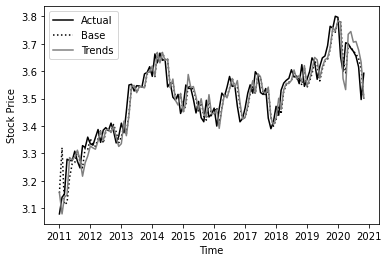

In [310]:
plt.plot(GSK.index[2:],GSK_actual, color='black', label='Actual')
plt.plot(GSK.index[2:],GSK_base, color='black', label='Base', linestyle=":")
plt.plot(GSK.index[2:],GSK_trends, color='gray', label='Trends')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [311]:
AE_GSK_b = abs(GSK_base - GSK_actual)
AE_JNJ_b = abs(JNJ_base - JNJ_actual)
AE_MRK_b = abs(MRK_base - MRK_actual)
AE_PFE_b = abs(PFE_base - PFE_actual)
AE_SNY_b = abs(SNY_base - SNY_actual)

In [312]:
AE_GSK_t = abs(GSK_trends - GSK_actual)
AE_JNJ_t = abs(JNJ_trends - JNJ_actual)
AE_MRK_t = abs(MRK_trends - MRK_actual)
AE_PFE_t = abs(PFE_trends - PFE_actual)
AE_SNY_t = abs(SNY_trends - SNY_actual)

In [313]:
diff_AE_GSK = AE_GSK_b - AE_GSK_t
diff_AE_JNJ = AE_JNJ_b - AE_JNJ_t
diff_AE_MRK = AE_MRK_b - AE_MRK_t
diff_AE_PFE = AE_PFE_b - AE_PFE_t
diff_AE_SNY = AE_SNY_b - AE_SNY_t

In [125]:
AE_GSK_b = abs(GSK_base_2020[1] - GSK_actual_2020)
#AE_GSK_t = abs(GSK_2020_t - GSK_actual_2020)
AE_GSK_va = abs(GSK_vaccine_2020 - GSK_actual_2020)
diff_AE_GSK_va = AE_GSK_b - AE_GSK_va
AE_GSK_vi = abs(GSK_virus_2020 - GSK_actual_2020)
diff_AE_GSK_vi = AE_GSK_b - AE_GSK_vi
AE_GSK_t = abs(GSK_2020_t - GSK_actual_2020)
diff_AE_GSK_t = AE_GSK_b - AE_GSK_va

<BarContainer object of 51 artists>

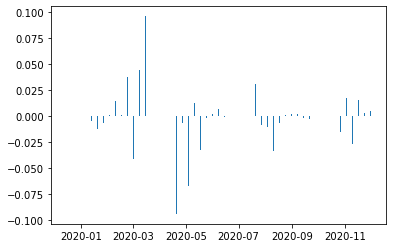

In [126]:
plt.bar(pd.to_datetime(diff_AE_GSK.index), diff_AE_GSK_va)

<BarContainer object of 51 artists>

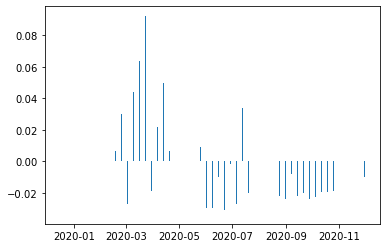

In [127]:
plt.bar(pd.to_datetime(diff_AE_GSK.index), diff_AE_GSK_vi)

<BarContainer object of 51 artists>

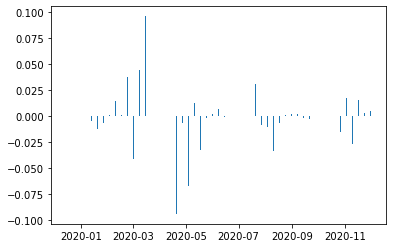

In [128]:
plt.bar(pd.to_datetime(diff_AE_GSK.index), diff_AE_GSK_t)

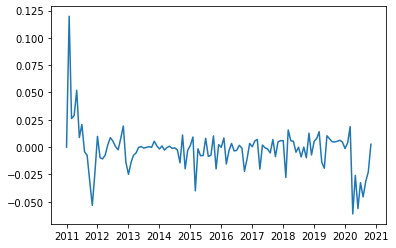

In [314]:
plt.plot(pd.to_datetime(diff_AE_GSK.index), diff_AE_GSK)

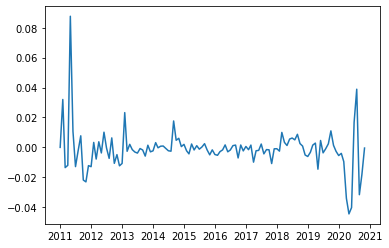

In [315]:
plt.plot(pd.to_datetime(diff_AE_JNJ.index), diff_AE_JNJ)

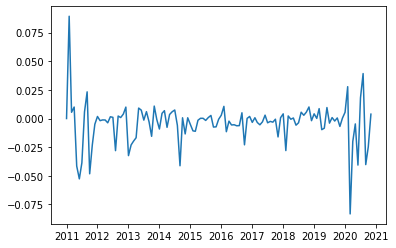

In [316]:
plt.plot(pd.to_datetime(diff_AE_MRK.index), diff_AE_MRK)

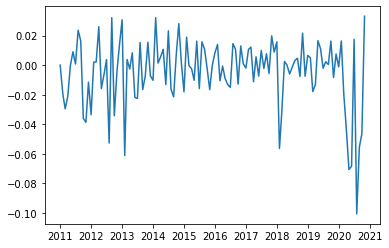

In [317]:
plt.plot(pd.to_datetime(diff_AE_PFE.index), diff_AE_PFE)

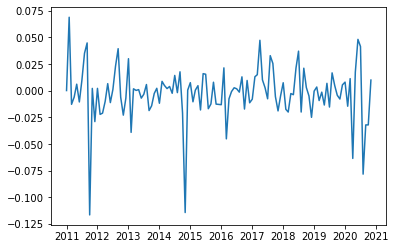

In [318]:
plt.plot(pd.to_datetime(diff_AE_SNY.index), diff_AE_SNY)